In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


###  Add 'overweight' column

In [4]:
df['overweight'] = (df['weight'] / ((df['height']/100)**2)).apply(lambda x: 1 if x > 25 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


### Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

In [5]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x>1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x>1 else 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


### Draw Categorical Plot

In [6]:
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
overweight       int64
dtype: object

In [7]:
df = df.astype(int)
df.dtypes

id             int64
age            int64
sex            int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
overweight     int64
dtype: object

In [8]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72,135,80,0,1,0,0,0,1,1


In [9]:
df_categoricals = pd.melt(df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], var_name='variable')
df_categoricals

,variable,value
0,cholesterol,0
1,cholesterol,1
2,cholesterol,1
3,cholesterol,0
4,cholesterol,0
...,...,...
419995,overweight,1
419996,overweight,1
419997,overweight,1
419998,overweight,1


In [10]:
df_categoricals.value_counts()

variable     value
alco         0        66236
smoke        0        63831
gluc         0        59479
active       1        56261
cholesterol  0        52385
overweight   1        43546
             0        26454
cholesterol  1        17615
active       0        13739
gluc         1        10521
smoke        1         6169
alco         1         3764
Name: count, dtype: int64

In [11]:
df_cat = pd.melt(df,id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], var_name='variable')
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


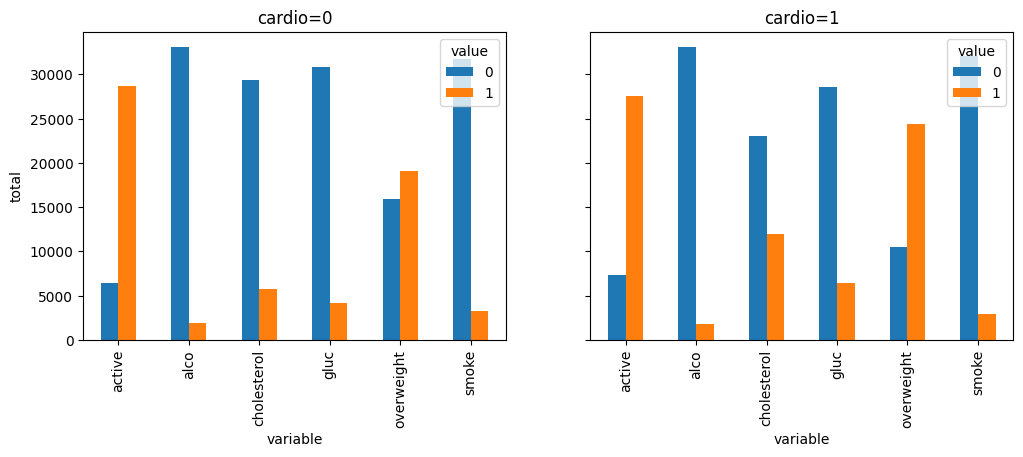

In [12]:
df_cat_g = df_cat.groupby('cardio')
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
for i, (name, group) in enumerate(df_cat_g):
    group.drop(['cardio'], axis=1, inplace=True)
    ax[i].set_title(f'cardio={name}')
    ax[i].set_xlabel('variable')
    ax[i].set_ylabel('total')
    group.value_counts().unstack().plot.bar(ax=ax[i])

In [13]:
len([rect for rect in ax[0].get_children() if isinstance(rect, mpl.patches.Rectangle)]) + len([rect for rect in ax[1].get_children() if isinstance(rect, mpl.patches.Rectangle)])

26

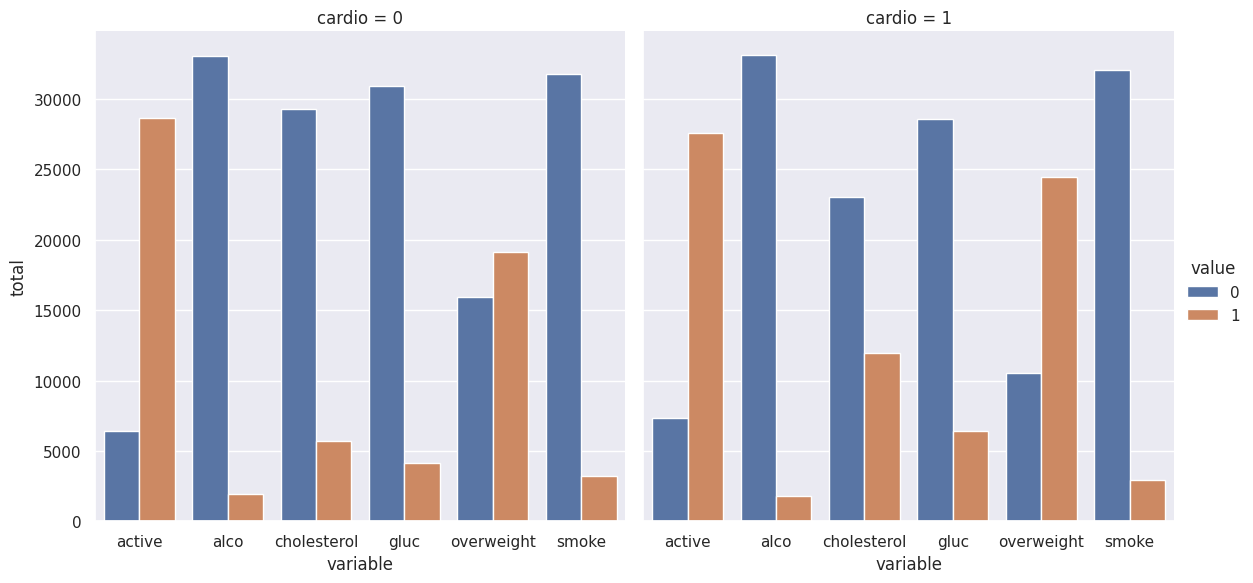

In [32]:
variable_order = sorted(df_cat['variable'].unique())
sns.set(style="darkgrid")

g = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count', height=6, aspect=1, order=variable_order, alpha=1)
g.set_axis_labels("variable", "total")
g.set_titles(col_template="cardio = {col_name}")
plt.show()

In [29]:
fig = g.fig
fig.savefig('catplot_sns.png')

In [16]:
df_categoricals = df.drop(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo'], axis=1)
df_categoricals

,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,1
2,1,0,0,0,0,1,0
3,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
69995,0,0,1,0,1,0,1
69996,1,1,0,0,1,1,1
69997,1,0,0,1,0,1,1
69998,0,1,0,0,0,1,1


In [33]:
df_categoricals.groupby(['cardio'])

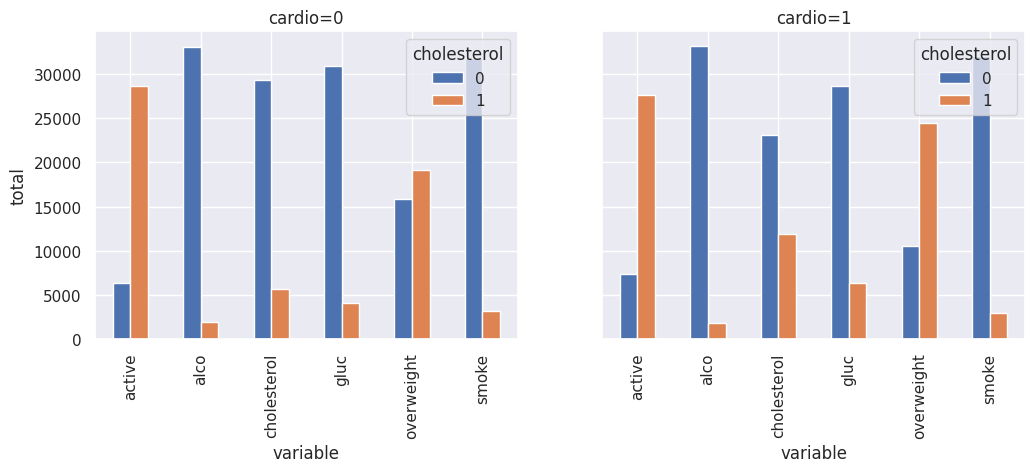

In [34]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
for i, (name, group) in enumerate(df_categoricals.groupby('cardio')):
    group.drop(['cardio'], axis=1, inplace=True)
    ax[i].set_title(f'cardio={name}')
    df_vc = pd.DataFrame()
    for col in group.columns:
        df_vc[col] = group[col].value_counts()
    df_vc = df_vc.T.sort_index()
    ax[i].set_xlabel('variable')
    ax[i].set_ylabel('total')
    df_vc.plot.bar(ax=ax[i])

### CLEAN DATA BEFORE PLOTING AS HEATMAP

In [35]:
(df['ap_lo']<=df['ap_hi']).value_counts()

True     68766
False     1234
Name: count, dtype: int64

In [36]:
((df['height'] >= df['height'].quantile(0.025))).value_counts()

height
True     68463
False     1537
Name: count, dtype: int64

In [37]:
((df['ap_lo']<=df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))).value_counts()

True     63259
False     6741
Name: count, dtype: int64

In [38]:
df_heat = df[(df['ap_lo']<=df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]
df_heat.shape

(63259, 14)

In [39]:
corr = df_heat.corr().apply(lambda x: round(x, 1))
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,0.1,0.1,-0.0,-0.0,-0.0,0.2,0.1
sex,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,-0.0,-0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.3,0.0,0.0,-0.1,-0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.0,0.1,0.1,0.3,1.0,0.0,0.2,0.1,0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,0.0,0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,0.2,0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,0.0,0.1,-0.0,-0.1,0.1,0.0,0.2,1.0,0.4,0.0,0.0,0.0,0.2,0.1
gluc,0.0,0.1,-0.0,-0.0,0.1,0.0,0.1,0.4,1.0,-0.0,0.0,-0.0,0.1,0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,0.0,-0.0,1.0,0.3,0.0,-0.0,-0.0


<Axes: >

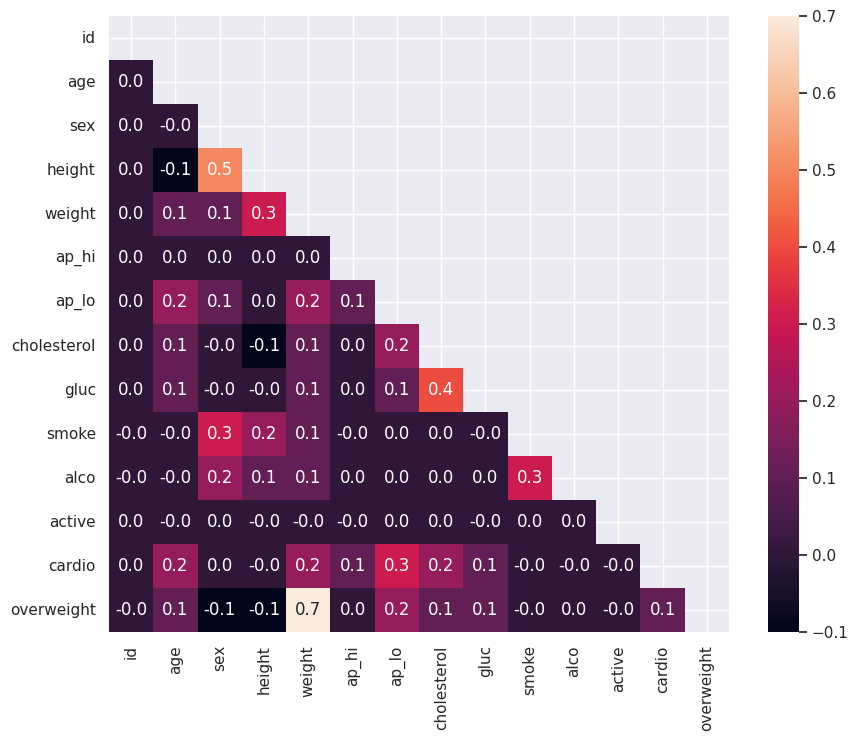

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, ax=ax, fmt='.1f')

In [43]:
fig.savefig('heatmap.png')

In [44]:
expected = ['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']

In [45]:
actual = [text.get_text() for text in ax.get_default_bbox_extra_artists() if isinstance(text, mpl.text.Text)]
len(actual) == len(expected)

True

In [46]:
fig.savefig('heatmap_.png')

In [ ]:

sns.heatmap(df.corr().apply(lambda x: round(x, 1)), annot=True, ax=ax, mask=np.triu(df.corr().apply(lambda x: round(x, 1))))

In [121]:
df.corr()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.003457,0.003154,-0.003038,-0.001834,0.003356,-0.002529,0.005290,0.002844,-0.003699,0.001210,0.003755,0.003799,-0.000832
age,0.003457,1.000000,-0.022609,-0.081515,0.053690,0.020764,0.017647,0.129697,0.088099,-0.047633,-0.029723,-0.009927,0.238159,0.092118
sex,0.003154,-0.022609,1.000000,0.498221,0.155125,0.005985,0.015195,-0.034729,-0.018318,0.337664,0.170682,0.005991,0.007953,-0.040700
height,-0.003038,-0.081515,0.498221,1.000000,0.291001,0.005488,0.006150,-0.048532,-0.019400,0.187989,0.094419,-0.006570,-0.010821,-0.115871
weight,-0.001834,0.053690,0.155125,0.291001,1.000000,0.030702,0.043703,0.137957,0.120408,0.067752,0.067077,-0.016864,0.181657,0.616103
ap_hi,0.003356,0.020764,0.005985,0.005488,0.030702,1.000000,0.016086,0.024730,0.012886,-0.000922,0.001408,-0.000033,0.054475,0.021255
ap_lo,-0.002529,0.017647,0.015195,0.006150,0.043703,0.016086,1.000000,0.026504,0.013747,0.005186,0.010601,0.004780,0.065719,0.030235
cholesterol,0.005290,0.129697,-0.034729,-0.048532,0.137957,0.024730,0.026504,1.000000,0.383252,0.017839,0.043610,0.005911,0.205536,0.133545
gluc,0.002844,0.088099,-0.018318,-0.019400,0.120408,0.012886,0.013747,0.383252,1.000000,0.002087,0.020606,-0.009061,0.090876,0.095970
smoke,-0.003699,-0.047633,0.337664,0.187989,0.067752,-0.000922,0.005186,0.017839,0.002087,1.000000,0.340094,0.025858,-0.015486,-0.001314
